In [39]:
from sklearn.datasets import load_breast_cancer

# Chọn các tập dữ liệu của UCI để thử nghiệm
X, y = load_breast_cancer(return_X_y = True)

print(X.shape)
print(y.shape)


(569, 30)
(569,)


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

y_train = to_categorical(y_train)
y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [43]:
import matplotlib.pyplot as plt
def plot_history(history, optimizer_name, ax):
    ax.plot(history.history['accuracy'])
    ax.plot(history.history['loss'])
    ax.set_title('model visualizations with optimizer: ' + optimizer_name)
    ax.set(xlabel = 'epoch', ylabel = 'percent')
    ax.legend(['accuracy', 'loss'])

In [44]:
def fit_with_optimizer(optimizer, axe):
    model = Sequential()
    model.add(Dense(256, activation='sigmoid'))
    model.add(Dense(64, activation='sigmoid'))
    model.add(Dense(32, activation='sigmoid'))
    model.add(Dense(2, activation='softmax'))
    if (optimizer == 'momentum'):
        model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.5),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
    else:
        model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs = 100, batch_size = 50)
    plot_history(history=history,optimizer_name=optimizer, ax=axe)

Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 0.6516 - accuracy: 0.6330
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6449 - accuracy: 0.6330
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6418 - accuracy: 0.6330
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6406 - accuracy: 0.6330
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6393 - accuracy: 0.6330
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6393 - accuracy: 0.6330
Epoch 7/100
10/10 [==============================] - 0s 14ms/step - loss: 0.6370 - accuracy: 0.6330
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6343 - accuracy: 0.6330
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6350 - accuracy: 0.6330
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6330 - accuracy: 0.6330
Epoch 11

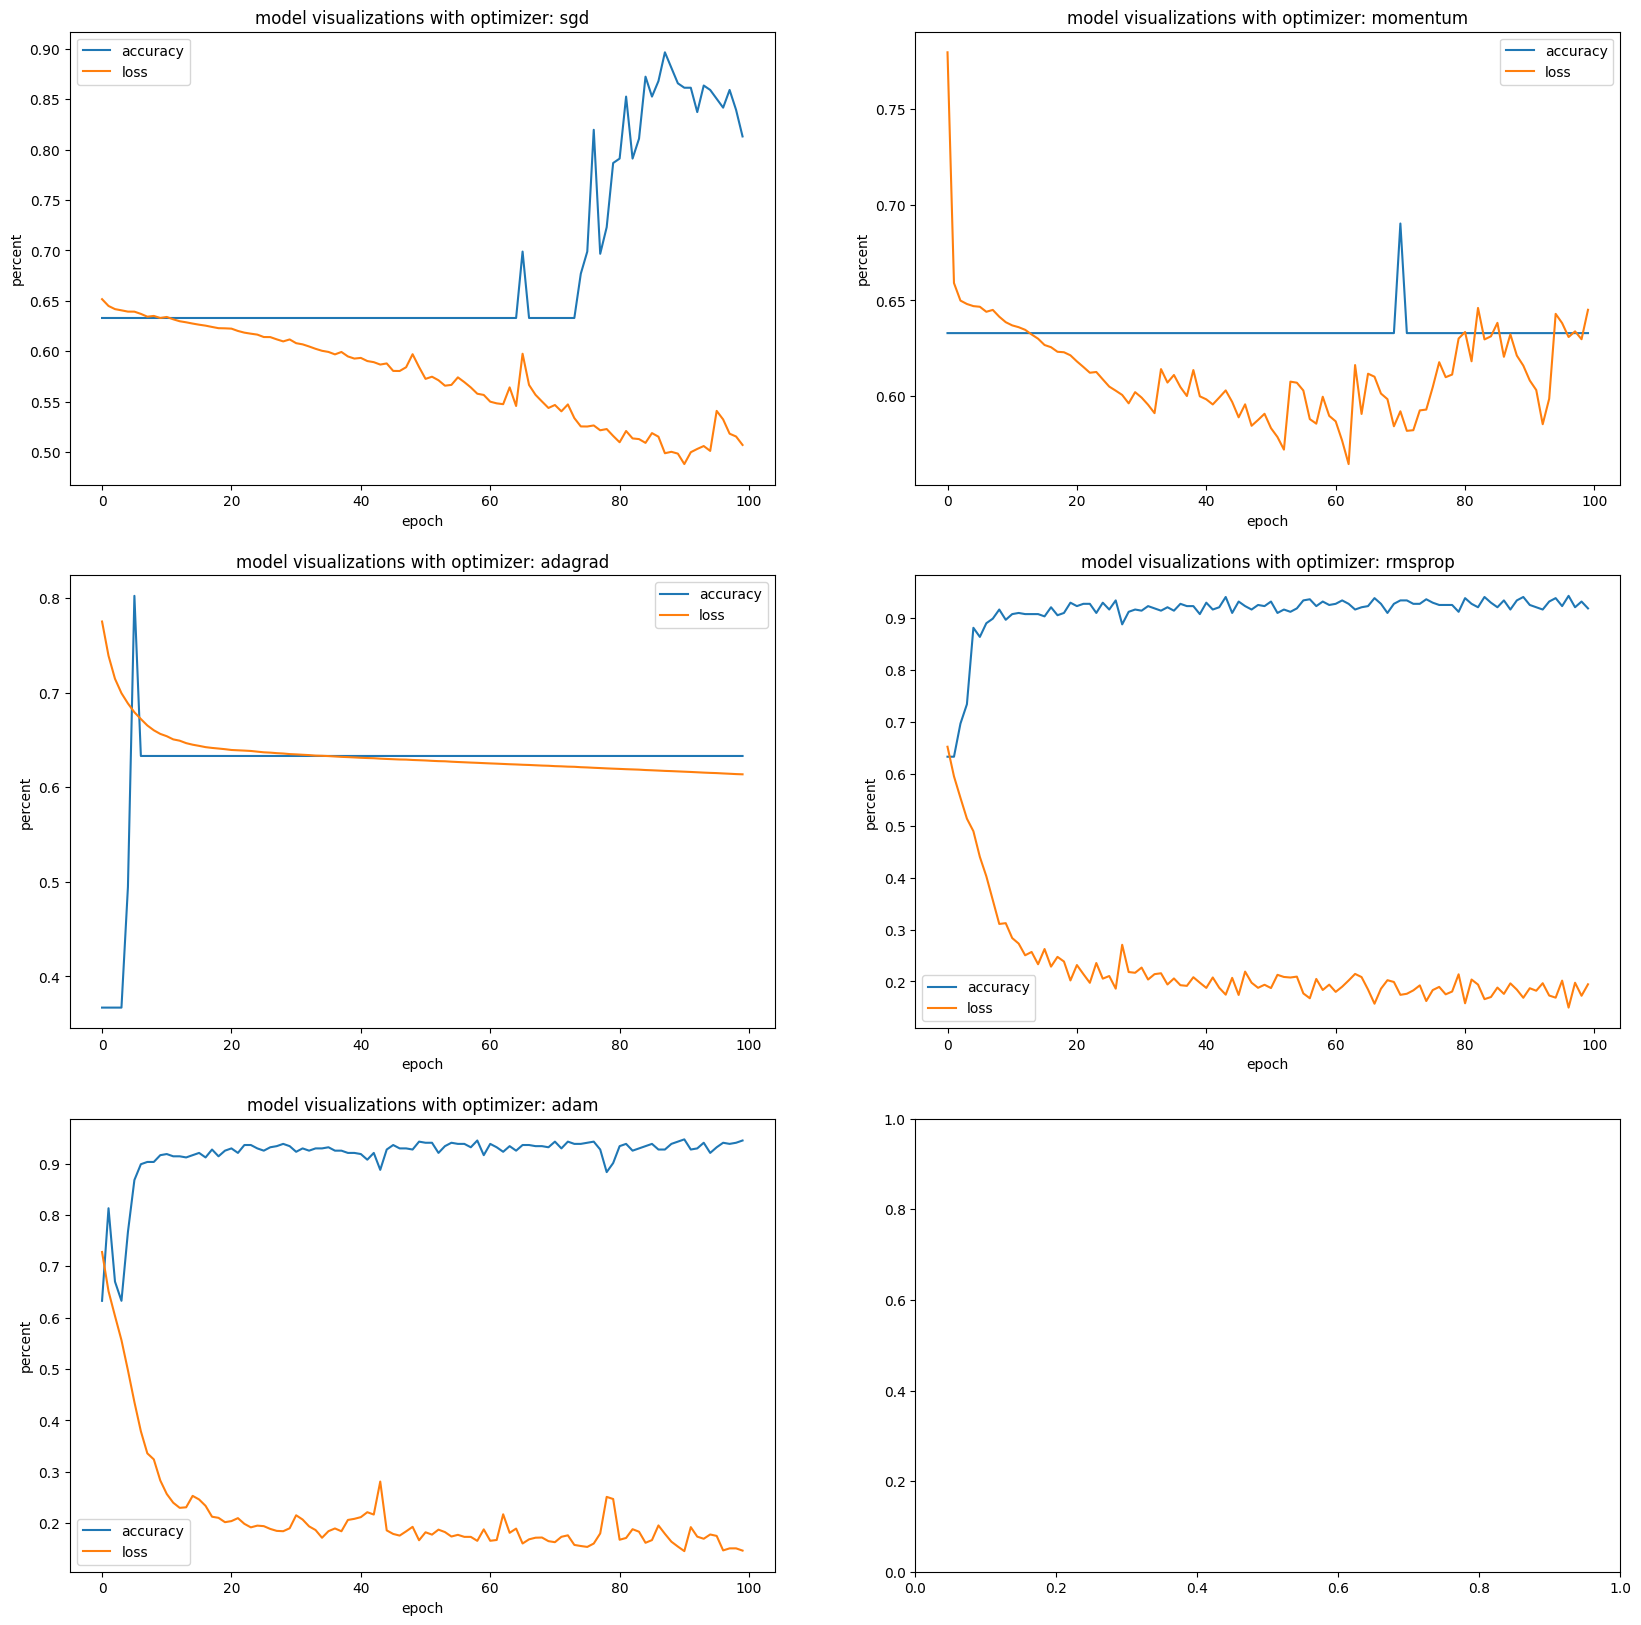

In [45]:
f, axes = plt.subplots(3,2,figsize=(20, 20))
list_of_optimizers = ['sgd', 'momentum', 'adagrad', 'rmsprop', 'adam']
count = 0
for opt in list_of_optimizers:
    fit_with_optimizer(opt, axes[count // 2, count % 2])
    count += 1